<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/student_pgmpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The (simplified) student Bayes net

This model is from https://github.com/pgmpy/pgmpy_notebook/blob/master/notebooks/2.%20Bayesian%20Networks.ipynb

In [1]:
!pip install  causalgraphicalmodels
!pip install pgmpy



     |████████████████████████████████| 337kB 3.0MB/s 


In [2]:
from causalgraphicalmodels import CausalGraphicalModel
import pgmpy
import numpy as np
import pandas as pd

# Model



<img src="https://user-images.githubusercontent.com/4632336/118884310-21bec180-b8ab-11eb-81cf-481553c21d8a.png?raw=true">


In [3]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

# Defining the model structure. We can define the network by just passing a list of edges.
model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])



## Basic CPDs

In [4]:
# Defining individual CPDs.
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]])

# The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums
# are the evidences and rows are the states of the variable. So the grade CPD is represented like this:
#
#    +---------+---------+---------+---------+---------+
#    | diff    | intel_0 | intel_0 | intel_1 | intel_1 |
#    +---------+---------+---------+---------+---------+
#    | intel   | diff_0  | diff_1  | diff_0  | diff_1  |
#    +---------+---------+---------+---------+---------+
#    | grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
#    +---------+---------+---------+---------+---------+
#    | grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
#    +---------+---------+---------+---------+---------+
#    | grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |
#    +---------+---------+---------+---------+---------+

cpd_g = TabularCPD(variable='G', variable_card=3, 
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])

cpd_l = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3])

cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],
                   evidence_card=[2])

# Associating the CPDs with the network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

In [5]:
print(model.get_cpds('G'))

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


## CPDs with names states

In [6]:
# CPDs can also be defined using the state names of the variables. If the state names are not provided
# like in the previous example, pgmpy will automatically assign names as: 0, 1, 2, ....

cpd_d_sn = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]], state_names={'D': ['Easy', 'Hard']})
cpd_i_sn = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]], state_names={'I': ['Dumb', 'Intelligent']})
cpd_g_sn = TabularCPD(variable='G', variable_card=3, 
                      values=[[0.3, 0.05, 0.9,  0.5],
                              [0.4, 0.25, 0.08, 0.3],
                              [0.3, 0.7,  0.02, 0.2]],
                      evidence=['I', 'D'],
                      evidence_card=[2, 2],
                      state_names={'G': ['A', 'B', 'C'],
                                   'I': ['Dumb', 'Intelligent'],
                                   'D': ['Easy', 'Hard']})

cpd_l_sn = TabularCPD(variable='L', variable_card=2, 
                      values=[[0.1, 0.4, 0.99],
                              [0.9, 0.6, 0.01]],
                      evidence=['G'],
                      evidence_card=[3],
                      state_names={'L': ['Bad', 'Good'],
                                   'G': ['A', 'B', 'C']})

cpd_s_sn = TabularCPD(variable='S', variable_card=2,
                      values=[[0.95, 0.2],
                              [0.05, 0.8]],
                      evidence=['I'],
                      evidence_card=[2],
                      state_names={'S': ['Bad', 'Good'],
                                   'I': ['Dumb', 'Intelligent']})

# These defined CPDs can be added to the model. Since, the model already has CPDs associated to variables, it will
# show warning that pmgpy is now replacing those CPDs with the new ones.
model.add_cpds(cpd_d_sn, cpd_i_sn, cpd_g_sn, cpd_l_sn, cpd_s_sn)
model.check_model()

True

In [7]:
 #Printing a CPD with it's state names defined.
print(model.get_cpds('G'))

+------+---------+---------+----------------+----------------+
| I    | I(Dumb) | I(Dumb) | I(Intelligent) | I(Intelligent) |
+------+---------+---------+----------------+----------------+
| D    | D(Easy) | D(Hard) | D(Easy)        | D(Hard)        |
+------+---------+---------+----------------+----------------+
| G(A) | 0.3     | 0.05    | 0.9            | 0.5            |
+------+---------+---------+----------------+----------------+
| G(B) | 0.4     | 0.25    | 0.08           | 0.3            |
+------+---------+---------+----------------+----------------+
| G(C) | 0.3     | 0.7     | 0.02           | 0.2            |
+------+---------+---------+----------------+----------------+


In [8]:
for cpd in model.get_cpds():
  print(cpd)

+---------+-----+
| D(Easy) | 0.6 |
+---------+-----+
| D(Hard) | 0.4 |
+---------+-----+
+----------------+-----+
| I(Dumb)        | 0.7 |
+----------------+-----+
| I(Intelligent) | 0.3 |
+----------------+-----+
+------+---------+---------+----------------+----------------+
| I    | I(Dumb) | I(Dumb) | I(Intelligent) | I(Intelligent) |
+------+---------+---------+----------------+----------------+
| D    | D(Easy) | D(Hard) | D(Easy)        | D(Hard)        |
+------+---------+---------+----------------+----------------+
| G(A) | 0.3     | 0.05    | 0.9            | 0.5            |
+------+---------+---------+----------------+----------------+
| G(B) | 0.4     | 0.25    | 0.08           | 0.3            |
+------+---------+---------+----------------+----------------+
| G(C) | 0.3     | 0.7     | 0.02           | 0.2            |
+------+---------+---------+----------------+----------------+
+---------+------+------+------+
| G       | G(A) | G(B) | G(C) |
+---------+------+------+-

# Inference

In [9]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)


## Posterior given Grade=C

In [10]:
evidence = {'G': 'C'}
postD = infer.query(['D'],  evidence=evidence).values
postI = infer.query(['I'],  evidence=evidence).values

print('\n')
print('Pr(Difficulty=Hard|Grade=C) = {:0.2f}'.format(postD[1]))
print('Pr(Intelligent=High|Grade=C) = {:0.2f}'.format(postI[1]))

Eliminating: S: 100%|██████████| 3/3 [00:00<00:00, 228.16it/s]



Pr(Difficulty=Hard|Grade=C) = 0.63
Pr(Intelligent=High|Grade=C) = 0.08


## Posterior given Grade=C, SAT=Good

In [11]:
evidence = {'G': 'C', 'S': 'Good'}
postD = infer.query(['D'],  evidence=evidence).values
postI = infer.query(['I'],  evidence=evidence).values

print('\n')
print('Pr(Difficulty=Hard|Grade=C,SAT=Good) = {:0.2f}'.format(postD[1]))
print('Pr(Intelligent=High|Grade=C,SAT=Good) = {:0.2f}'.format(postI[1]))

Eliminating: L: 100%|██████████| 2/2 [00:00<00:00, 239.13it/s]



Pr(Difficulty=Hard|Grade=C,SAT=Good) = 0.76
Pr(Intelligent=High|Grade=C,SAT=Good) = 0.58


# Visualization

## DAG

<class 'graphviz.dot.Digraph'>


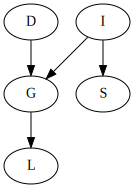

'student_pgm.pdf'

In [30]:
model2 = CausalGraphicalModel(nodes = model.nodes(), edges=model.edges())

dot = model2.draw()
print(type(dot))
display(dot)
dot.render(filename='student_pgm', format='pdf')
# creates student_pgm (a text file of the graph) and student_pgm.pdf

In [20]:
from google.colab import files
files.view('student_pgm') # open text file

<IPython.core.display.Javascript object>

## CPTs

In [24]:
%run pgmpy_utils.py

In [14]:

import pgmpy_utils as pgm


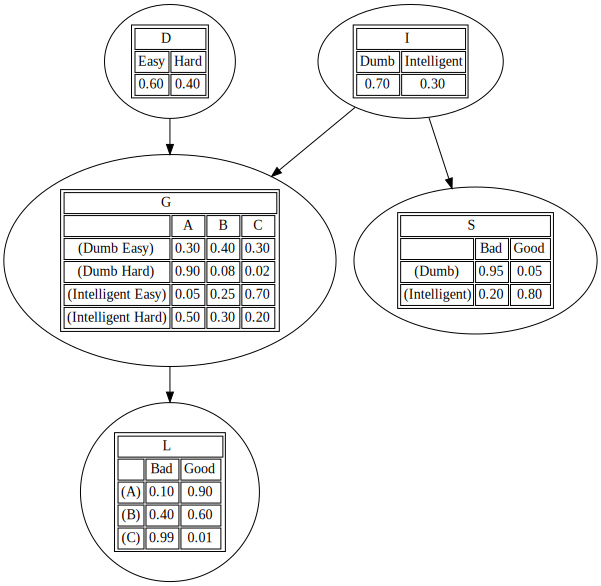

'student_pgm_with_cpt.pdf'

In [31]:
dot = pgm.visualize_model(model)
display(dot)
dot.render('student_pgm_with_cpt', format='pdf')


## Marginals

In [26]:

evidence = {'G': 'C'}
marginals = get_marginals(model, evidence)
print(marginals)

Eliminating: I: 100%|██████████| 3/3 [00:00<00:00, 533.47it/s]

{'D': array([0.37070938, 0.62929062]), 'G': array([0., 0., 1.]), 'I': array([0.92105263, 0.07894737]), 'L': array([0.99, 0.01]), 'S': array([0.89078947, 0.10921053])}


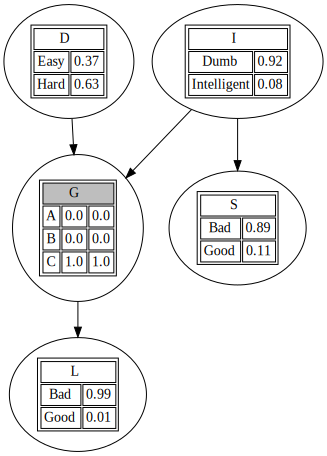

'student_pgm_marginals_given_grade.pdf'

In [32]:
dot = visualize_marginals(model, evidence, marginals)
display(dot)
dot.render('student_pgm_marginals_given_grade', format='pdf')

Eliminating: I: 100%|██████████| 2/2 [00:00<00:00, 263.82it/s]

{'D': array([0.24044002, 0.75955998]), 'G': array([0., 0., 1.]), 'I': array([0.42168675, 0.57831325]), 'L': array([0.99, 0.01]), 'S': array([0., 1.])}


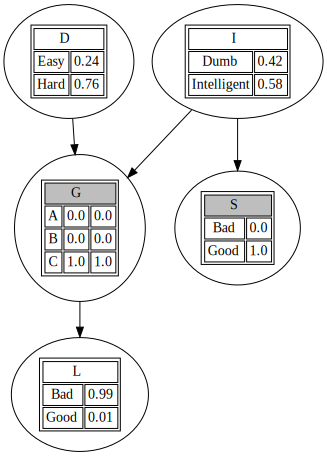

'student_pgm_marginals_given_grade_sat.pdf'

In [38]:

evidence = {'G': 'C', 'S': 'Good'}
marginals = pgm.get_marginals(model, evidence)
print(marginals)

dot = visualize_marginals(model, evidence, marginals)
display(dot)
dot.render('student_pgm_marginals_given_grade_sat', format='pdf')